In [ ]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

In [ ]:
# !kaggle datasets download -d apoorvwatsky/miraclvc1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Project-X-Lip-Reading

/content/drive/.shortcut-targets-by-id/1_r1ryXDRaCdsR0PFGkkxkbeXFIv5d38H/Project-X-Lip-Reading


In [ ]:
# import zipfile
# zip_ref = zipfile.ZipFile('/content/miraclvc1.zip','r')
# zip_ref.extractall('/content')
# zip_ref.close()

In [ ]:
import pickle
import time
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, Activation, MaxPool3D, Reshape, Bidirectional, LSTM, Dropout, Flatten, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import CategoricalCrossentropy

In [ ]:
with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/train/X_train.pkl', 'rb') as f:
    X_train = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/train/y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/test/X_test.pkl', 'rb') as f:
    X_test = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/test/y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/val/X_val.pkl', 'rb') as f:
    X_val = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/val/y_val.pkl', 'rb') as f:
    y_val = pickle.load(f)


In [ ]:
model = Sequential()

# Define the input shape using Input layer
model.add(Input(shape=(28, 100, 100, 1)))

model.add(Conv3D(128, 3, activation='relu', padding='same'))
model.add(MaxPooling3D((2, 2, 2)))

model.add(Conv3D(256, 3, activation='relu', padding='same'))
model.add(MaxPooling3D((2, 2, 2)))

model.add(Conv3D(75, 3, activation='relu', padding='same'))
model.add(MaxPooling3D((2, 2, 2)))

# Corrected Reshape layer
model.add(Reshape((75, 2 * 12 * 12)))

model.add(Bidirectional(LSTM(32, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(0.5))

model.add(Bidirectional(LSTM(32, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# from keras.models import Sequential
# from keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout, BatchNormalization

# model = Sequential()

# # 1st Convolutional Layer with 64 filters of size 3x3x3
# model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu', input_shape=(SEQUENCE_LENGTH, MAX_WIDTH, MAX_HEIGHT, 1)))
# model.add(BatchNormalization())
# model.add(MaxPooling3D(pool_size=(2, 2, 2)))

# # 2nd Convolutional Layer with 128 filters of size 3x3x3
# model.add(Conv3D(128, kernel_size=(3, 3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling3D(pool_size=(2, 2, 2)))

# # 3rd Convolutional Layer with 256 filters of size 2x2x2
# model.add(Conv3D(256, kernel_size=(2, 2, 2), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling3D(pool_size=(2, 2, 2)))

# # Flatten the data for the fully connected layers
# model.add(Flatten())

# # 1st Fully Connected Layer with 4096 units
# model.add(Dense(4096, activation='relu'))
# model.add(Dropout(0.5))

# # 2nd Fully Connected Layer with 2048 units
# model.add(Dense(2048, activation='relu'))
# model.add(Dropout(0.5))

# model.add(Dense(10, activation='softmax'))




In [ ]:
model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv3d_8 (Conv3D)                    │ (None, 22, 100, 100, 128)   │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_6 (MaxPooling3D)       │ (None, 11, 50, 50, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_9 (Conv3D)                    │ (None, 11, 50, 50, 256)     │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_7 (MaxPooling3D)       │ (None, 5, 25, 25, 256)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_10 (Conv3D)                   │ (None, 5, 25, 25, 75)       │         518,475 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_8 (MaxPooling3D)       │ (None, 2, 12, 12, 75)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 75, 288)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 75, 64)              │          82,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 75, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 75, 64)              │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 75, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4800)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          48,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,562,069 (5.96 MB)

 Trainable params: 1,562,069 (5.96 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
graph = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=16)

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.3250 - loss: 1.5301 - val_accuracy: 0.3571 - val_loss: 1.4014
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 25s 856ms/step - accuracy: 0.2857 - loss: 1.2836 - val_accuracy: 0.3571 - val_loss: 1.0846
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 861ms/step - accuracy: 0.3713 - loss: 1.1640 - val_accuracy: 0.5000 - val_loss: 1.0795
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 865ms/step - accuracy: 0.4081 - loss: 1.1290 - val_accuracy: 0.3571 - val_loss: 1.0771
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 859ms/step - accuracy: 0.4519 - loss: 1.0633 - val_accuracy: 0.3571 - val_loss: 1.0795
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 858ms/step - accuracy: 0.4745 - loss: 1.0365 - val_accuracy: 0.4286 - val_loss: 1.0029
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 853ms/step - accuracy: 0.4442 - loss: 1.0168 - val_accuracy: 0.5000 - val_loss: 0.9227
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 850ms/step - accuracy: 0.5123 - loss: 0.9014 - val_accuracy: 0.7857 - val_l

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9231 - loss: 0.1812
Test loss: 0.18124300241470337, Test accuracy: 0.9230769276618958


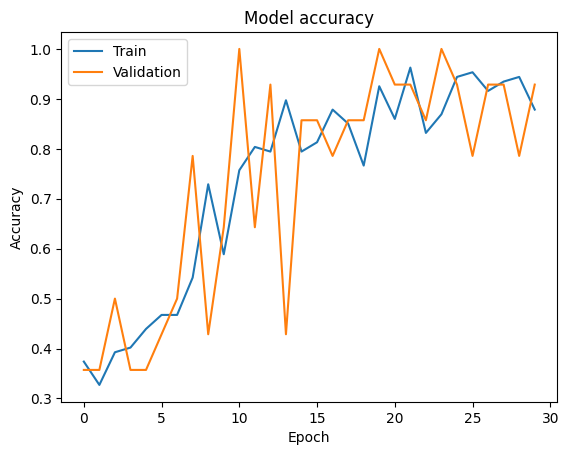

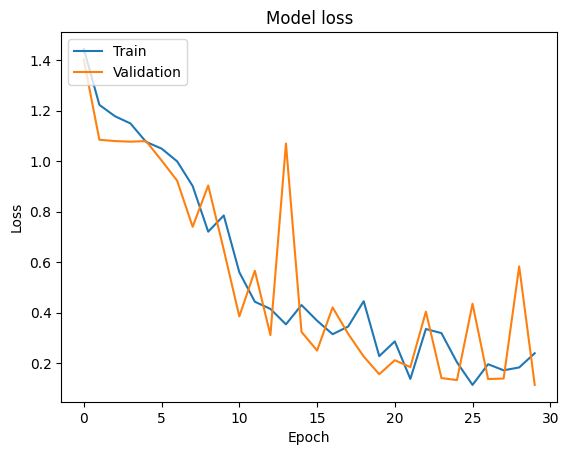

In [ ]:
# Plot training & validation accuracy values
plt.plot(graph.history['accuracy'])
plt.plot(graph.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(graph.history['loss'])
plt.plot(graph.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
